Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta1, beta2, beta3, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 205 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,132.38,11.35,111.24,153.45,0.21,0.15,2896.38,2925.99,1.0
beta1,33.98,7.53,19.37,47.69,0.11,0.08,4588.17,3049.62,1.0
beta2,3.86,7.23,-10.13,16.92,0.11,0.11,4076.83,2739.22,1.0
beta3,-3.80,7.24,-17.86,9.25,0.11,0.10,4170.52,2849.11,1.0
sigma,106.22,6.58,94.09,118.57,0.13,0.09,2614.90,2823.26,1.0


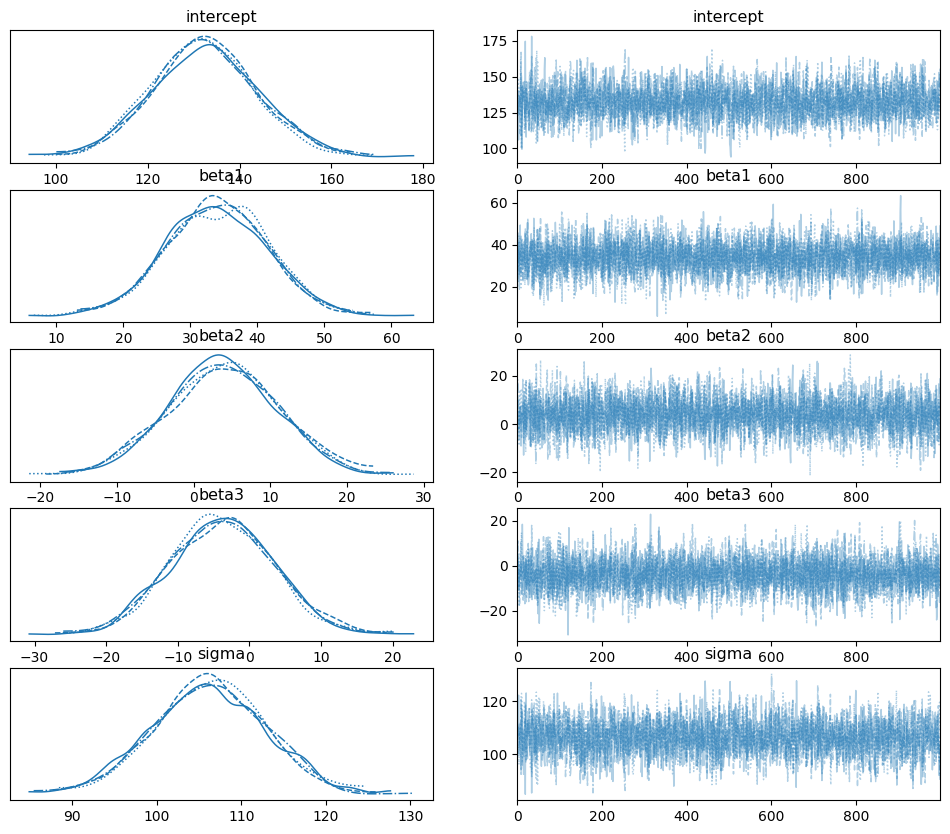

In [15]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

# datele din fisier
data = pd.read_csv("real_estate_data.csv")

# normalizarea detalor
scaler = StandardScaler()
data[['Surface_area', 'Distance_to_center']] = scaler.fit_transform(data[['Surface_area', 'Distance_to_center']])
data['Rooms'] = (data['Rooms'] - data['Rooms'].mean()) / data['Rooms'].std()  

# atribuirea datelor normalizate unor variabile
x1 = data['Surface_area'].values  
x2 = data['Rooms'].values         
x3 = data['Distance_to_center'].values  
y = data['Price'].values          

# construirea modelului 
with pm.Model() as model:
    intercept = pm.Normal("intercept", mu=0, sigma=10) # termenul constant din model
    beta1 = pm.Normal("beta1", mu=0, sigma=10)  
    beta2 = pm.Normal("beta2", mu=0, sigma=10) 
    beta3 = pm.Normal("beta3", mu=0, sigma=10) 

    # sigma deviatia standard a erorii din model
    sigma = pm.HalfNormal("sigma", sigma=10)

    # predictia
    mu = intercept + beta1 * x1 + beta2 * x2 + beta3 * x3

    # datele observate
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # esantionarea
    trace = pm.sample(1000, return_inferencedata=True)


az.plot_trace(trace)
az.summary(trace, round_to=2)


b) Conform rezultatelor obtine, beta1 are cea mai mare medie deci putem spune ca suprafata are cea mai mare importanta in stabilirea pretului.